<a href="https://colab.research.google.com/github/Mayank300/CLASWORK-122/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

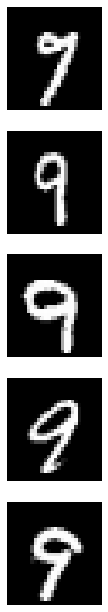

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X,Y = fetch_openml('mnist_784', version=1, return_X_y=True )
print(pd.Series(Y).value_counts())

classes = ['0','1','2','3','4','5','6','7','8','9']
n_classes = len(classes)
sample_class = 5

fig = plt.figure(figsize=(n_classes*2, (1+sample_class * 2)))
index_class = 0

for cls in classes:
  ids = np.flatnonzero(Y==cls)
  ids = np.random.choice(ids,sample_class, replace=False)
  i = 0

  for id in ids:
    pltid = i*n_classes + index_class + 1 
    pltsub = plt.subplot(sample_class,n_classes,pltid)
    pltsub = sns.heatmap(np.reshape(X[id], (28,28) ), cmap=plt.cm.gray, xticklabels=False, yticklabels=False, cbar=False )
    pltsub = plt.axis('off')
    i+= 1

index_class+=1

# print(len(X))
print(X[0])
print(Y[0])




In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=9, train_size=7500, test_size=2500)

X_train_scale = X_train / 255.0
X_test_scale = X_test / 255.0

classifier  = LogisticRegression(solver = 'saga', multi_class='multinomial').fit(X_train_scale,Y_train)
y_pred = classifier.predict(X_test_scale)
acc = accuracy_score(Y_test, y_pred)

print(acc)



0.9


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


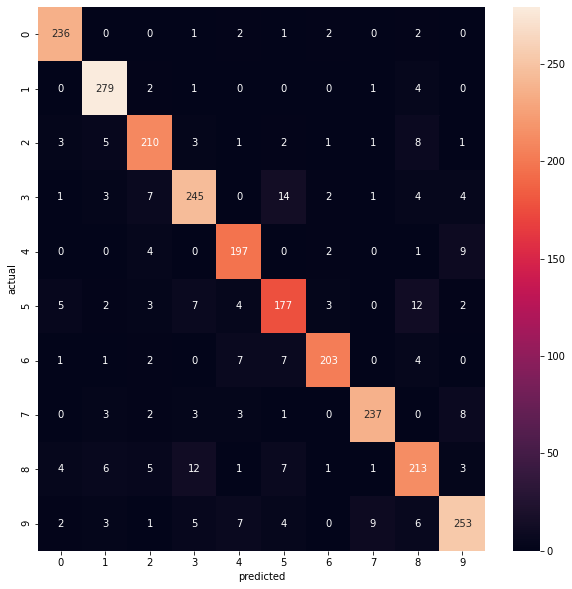

In [ ]:
ccmm = pd.crosstab(Y_test,y_pred, rownames=['actual'], colnames=['predicted'])

pltsub = plt.figure(figsize=(10,10))
pltsub = sns.heatmap(ccmm, annot=True, fmt='d', cbar=True)
